# SMAI Assignment - 3

## Question - `1` : Support Vector Machines

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `09.03.2023` |
| Due Date | `24.03.2023` |

This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from matplotlib import gridspec
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
from sklearn.svm import SVC
import random
from cvxpy import *
import seaborn as sns
from sklearn.model_selection import train_test_split
from numpy import linalg as LA
import cv2
import math
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Subsection 1

In [ ]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')

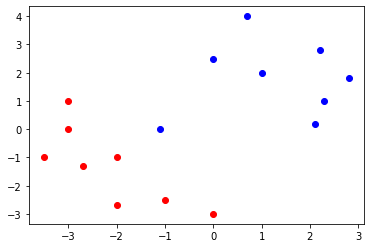

In [ ]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_points(X, y)
plt.show()

In [ ]:
print(X.shape)

(16, 2)


In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**

**Note: You cannot use sklearn SVM functions here**

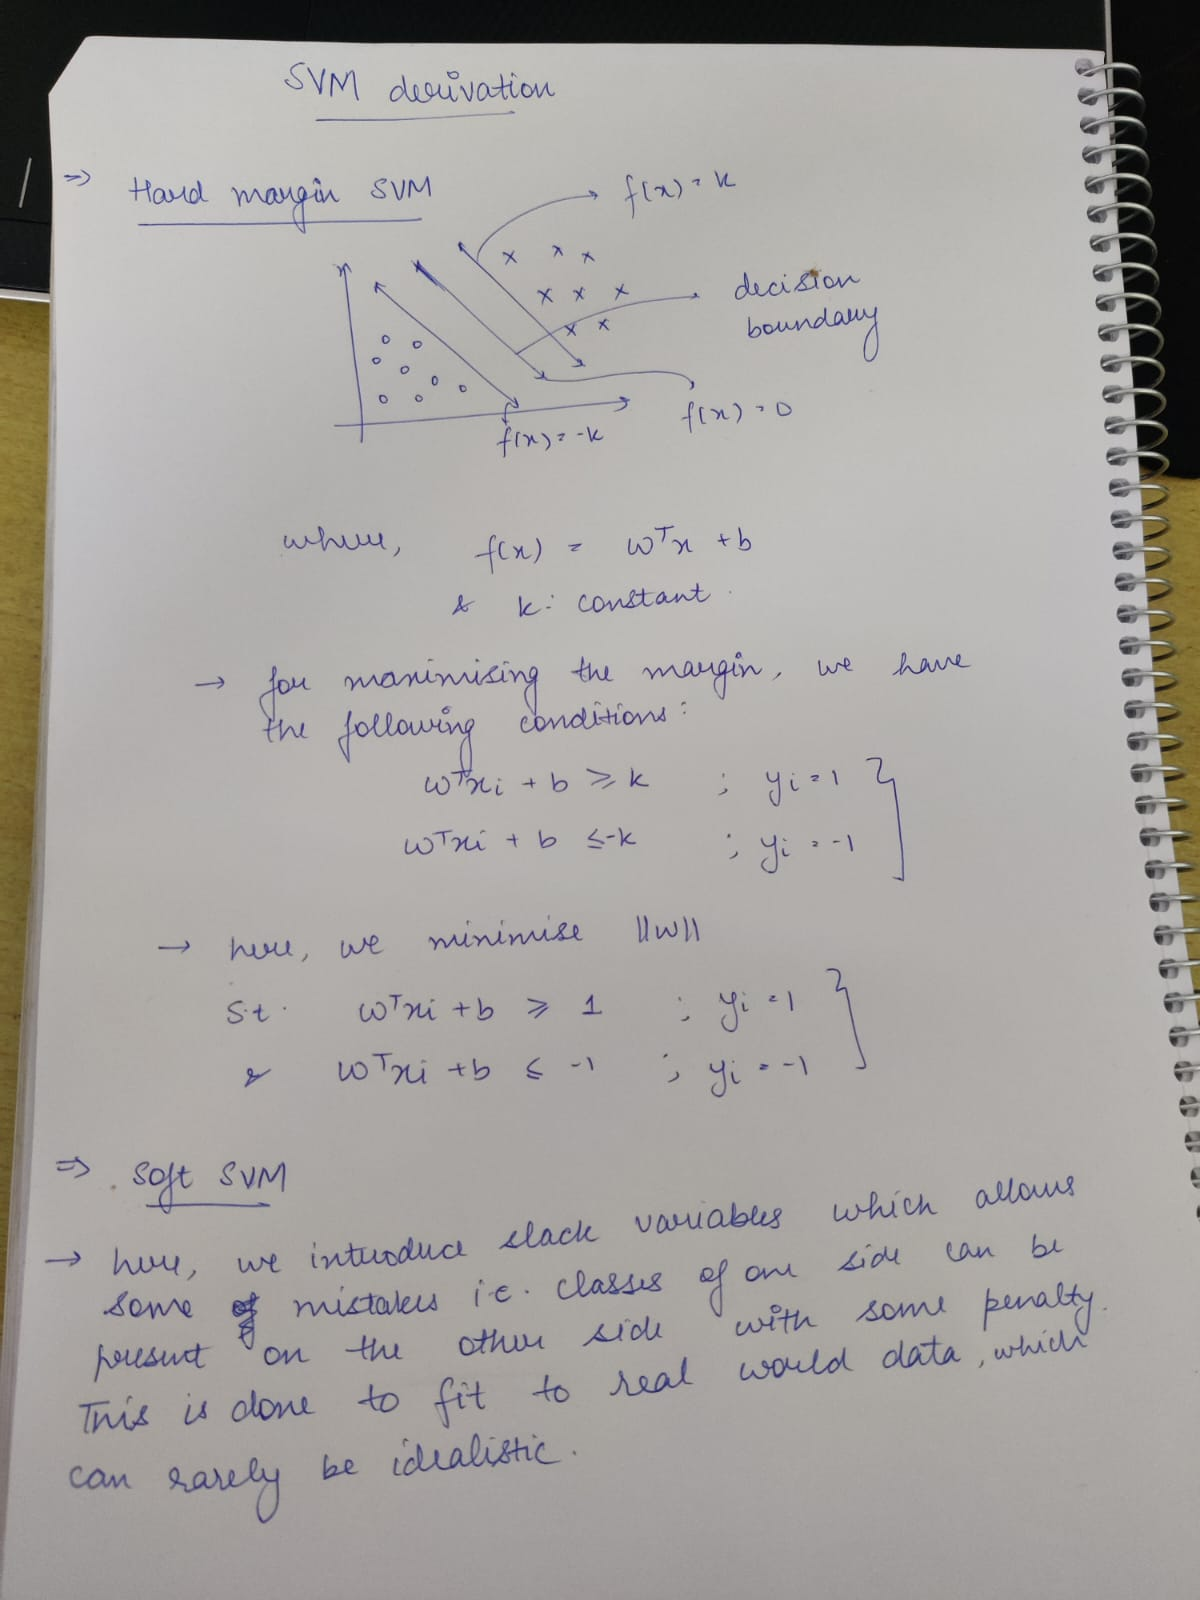

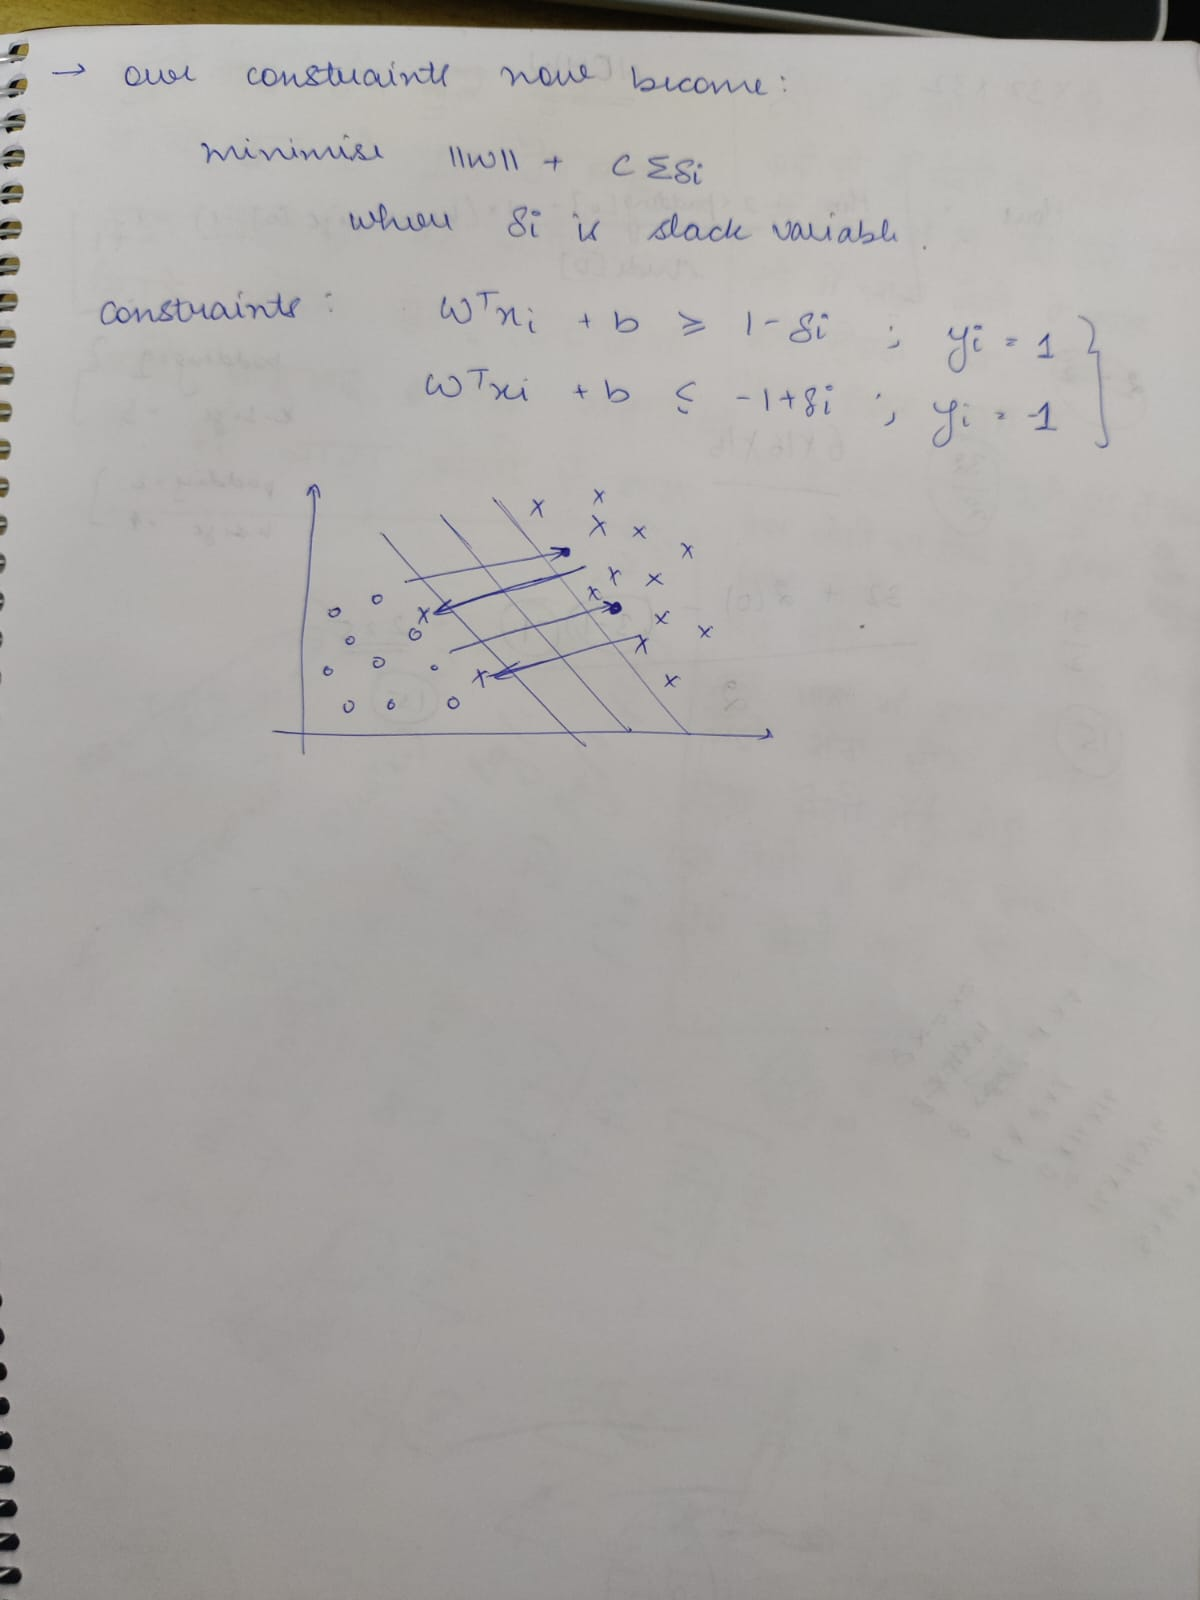

In [ ]:
# Write your code here
img1 = cv2.imread('/content/drive/My Drive/svm/1.jpeg')
img2 = cv2.imread('/content/drive/My Drive/svm/2.jpeg')
cv2_imshow(img1)
cv2_imshow(img2)

In [ ]:
class SVM_hard():
    def __init__(self, X, y):
        self.num_points_class = int(X.shape[0] / 2)
        self.X = X
        self.y = y
        self.d = 2
        self.margin = 1

    def hard_margin(self):
        a = Variable((self.d, 1))
        b = Variable()

        w_norm = norm(a,2)
        obj = Minimize((w_norm))

        const1 = [a.T @ self.X[i] + b >= self.margin for i in range(self.num_points_class)]
        const2 = [a.T @ self.X[i] + b <= -self.margin for i in range(self.num_points_class, 2*self.num_points_class)]

        const = const1 + const2
        problem = Problem(obj, const)
        problem.solve()

        self.w = a.value
        self.b = b.value

    def predict(self):
        pos_corr, neg_corr, incorr = 0,0,0

        for ind, i in enumerate(self.X):
            pred = i.dot(self.w) + self.b
            if pred < 0 and self.y[ind] == -1:
                neg_corr += 1
            elif pred > 0 and self.y[ind] == 1:
                pos_corr += 1
            # else:
            #     incorr += 1

        total_corr = pos_corr + neg_corr
        self.acc = total_corr / self.X.shape[0]

In [ ]:
svm_hard = SVM_hard(X, y)
svm_hard.hard_margin()
svm_hard.predict()

print(f'W: {svm_hard.w}\nB: {svm_hard.b}\nAcc: {svm_hard.acc}')

W: [[-1.73913043]
 [-1.30434783]]
B: -2.9130434783188317
Acc: 1.0


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

In [ ]:
# Write your code here
def plot_classification(X, Y, p, q):
    reds, blues = list(), list()
    shape = Y.shape[0]
    for i in range(shape):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')
    x = np.linspace(-5, 5, 20)
    line0 = (-q - p[0]*x)/p[1]
    line1 = (-q - (p[0]*x) + 1)/p[1]
    line2 = (-q - (p[0]*x) - 1)/p[1]
    colors = ['m', 'g--', 'y--']
    plt.plot(x, line0 , colors[0])
    plt.plot(x, line1 ,colors[1])
    plt.plot(x, line2 , colors[2])

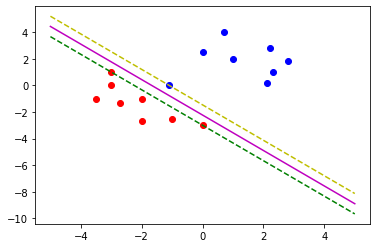

In [ ]:
plot_classification(X, y, svm_hard.w, svm_hard.b)

In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.

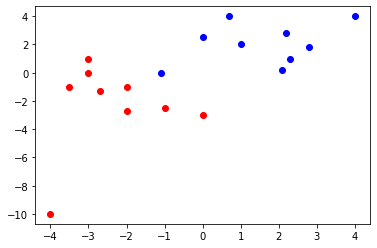

In [ ]:
# Re-create the Synthetic Data by adding the points and visualize the points
pt1, pt2 = [4,4], [-4,-10]
new_pts = np.array([pt1])
new_X = np.insert(X,8, pt2, axis=0)
new_X = np.vstack([new_X, new_pts])
new_y = np.insert(y,8, [1])
new_y = np.append(new_y, [-1])
plot_points(new_X, new_y)
plt.show()

W: [[-1.73913043]
 [-1.30434783]]
B: -2.9130434783188317
Acc: 1.0


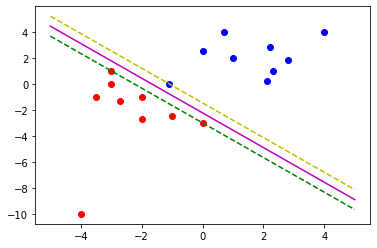

In [ ]:
# Solve for the decision boundary using this modified dataset
svm_hard = SVM_hard(X, y)
svm_hard.hard_margin()
svm_hard.predict()

print(f'W: {svm_hard.w}\nB: {svm_hard.b}\nAcc: {svm_hard.acc}')
plot_classification(new_X, new_y, svm_hard.w, svm_hard.b)

#### Explanation
The 2 new points added were already correctly classified according to the originally created support vectors. Hence adding them did not change the decision boundary.

In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?

**Note: Use the modified X and y i.e after adding points in previous cell**

In [ ]:
class SVM_soft():
    def __init__(self, X, y):
        self.num_points_class = int(X.shape[0] / 2)
        self.X = X
        self.y = y
        self.d = 2
        self.margin = 1

    def soft_margin(self, C):
        a = Variable((self.d, 1))
        b = Variable()
        u = Variable(self.num_points_class)
        v = Variable(self.num_points_class)
        u_dash = np.ones(self.num_points_class)@u
        v_dash = np.ones(self.num_points_class)@v
        gamma = Parameter()
        gamma.value = C

        w_norm = norm(a,2)
        obj = Minimize(w_norm + gamma*(u_dash + v_dash))

        const1 = [a.T @ self.X[i] + b >= self.margin - u[i] for i in range(self.num_points_class)]
        const2 = [a.T @ self.X[i] + b <= -self.margin + v[i-self.num_points_class] for i in range(self.num_points_class, 2*self.num_points_class)]
        const3 = [u[i] >= 0 for i in range(self.num_points_class)]
        const4 = [v[i] >= 0 for i in range(self.num_points_class)]

        const = const1 + const2 + const3 + const4
        problem = Problem(obj, const)
        problem.solve()

        self.w = a.value
        self.b = b.value

    def predict(self):
        pos_corr, neg_corr, incorr = 0,0,0

        for ind, i in enumerate(self.X):
            pred = i.dot(self.w) + self.b
            if pred < 0 and self.y[ind] == -1:
                neg_corr += 1
            elif pred > 0 and self.y[ind] == 1:
                pos_corr += 1
            # else:
            #     incorr += 1

        total_corr = pos_corr + neg_corr
        self.acc = total_corr / self.X.shape[0]

W: [[-1.43253146e-12]
 [-1.55765611e-12]]
B: 0.06885090599738183
Acc: 0.5


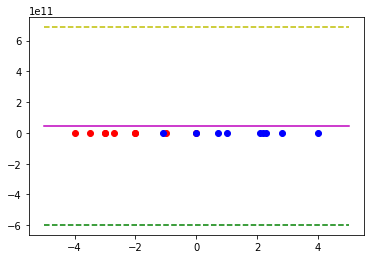

In [ ]:
# Write your code here for C= 0.01
svm_soft = SVM_soft(new_X, new_y)
svm_soft.soft_margin(C=0.01)
svm_soft.predict()
print(f'W: {svm_soft.w}\nB: {svm_soft.b}\nAcc: {svm_soft.acc}')
plot_classification(new_X, new_y, svm_soft.w, svm_soft.b)

W: [[-0.35022764]
 [-0.29954473]]
B: -0.05068290650435438
Acc: 0.9444444444444444


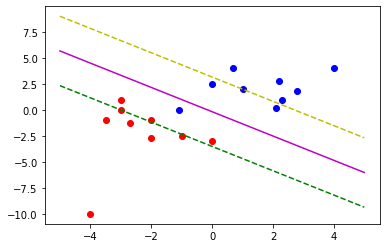

In [ ]:
# Write your code here for C= 0.1
svm_soft = SVM_soft(new_X, new_y)
svm_soft.soft_margin(C=0.1)
svm_soft.predict()
print(f'W: {svm_soft.w}\nB: {svm_soft.b}\nAcc: {svm_soft.acc}')
plot_classification(new_X, new_y, svm_soft.w, svm_soft.b)

W: [[-1.73913044]
 [-1.30434783]]
B: -2.913043478685383
Acc: 1.0


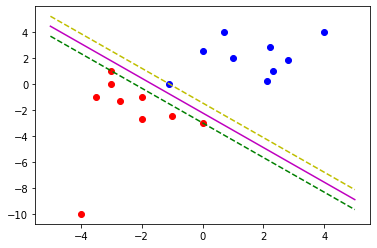

In [ ]:
# Write your code here for C= 3
svm_soft = SVM_soft(new_X, new_y)
svm_soft.soft_margin(C=3)
svm_soft.predict()
print(f'W: {svm_soft.w}\nB: {svm_soft.b}\nAcc: {svm_soft.acc}')
plot_classification(new_X, new_y, svm_soft.w, svm_soft.b)

W: [[-1.73913044]
 [-1.30434783]]
B: -2.91304347879632
Acc: 1.0


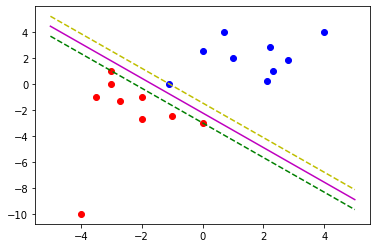

In [ ]:
# Write your code here for C= 10
svm_soft = SVM_soft(new_X, new_y)
svm_soft.soft_margin(C=10)
svm_soft.predict()
print(f'W: {svm_soft.w}\nB: {svm_soft.b}\nAcc: {svm_soft.acc}')
plot_classification(new_X, new_y, svm_soft.w, svm_soft.b)

W: [[-1.73913043]
 [-1.30434783]]
B: -2.9130434784426154
Acc: 1.0


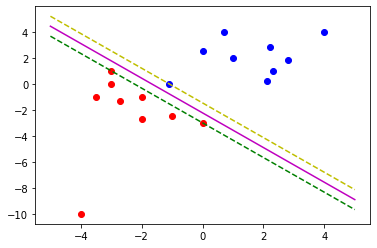

In [ ]:
# Write your code here for C= 100
svm_soft = SVM_soft(new_X, new_y)
svm_soft.soft_margin(C=100)
svm_soft.predict()
print(f'W: {svm_soft.w}\nB: {svm_soft.b}\nAcc: {svm_soft.acc}')
plot_classification(new_X, new_y, svm_soft.w, svm_soft.b)

#### Explanation
Lower value of C means that the misclassification is not penalised. This allows for more values to be misclassified and the decision boundary to be "softer." As we see for the case C=0.01, the decision boundary does not classify most of the points correctly, because we didn't penalise it for the same. However as we increase the C value, it penalises misclassification more. For very high C values (like in the case of C=100), it becomes equivalent to the hard margin SVM which is also reflected by the fact that the values for W and b are the same as in the hard margin SVM classifier.

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

In [ ]:
# Write your Code here
def find_support_vec(W, b, X, y):
    support_vectors = list()
    for ind, i in enumerate(X):
        pred = np.dot(W, i) + b
        if y[ind] == 1 and math.fabs(1-pred) <= 0.01:
            support_vectors.append(i)
        elif math.fabs(-1-pred) <= 0.01:
            support_vectors.append(i)
    return support_vectors

svecs = find_support_vec(svm_soft.w.flatten(), svm_soft.b, new_X, new_y)
svecs

[array([-3.,  1.]), array([ 0., -3.]), array([-1.1,  0. ])]

In [ ]:
X.shape, X

((16, 2), array([[-3.5, -1. ],
        [-3. ,  0. ],
        [-3. ,  1. ],
        [-2.7, -1.3],
        [-2. , -1. ],
        [-2. , -2.7],
        [-1. , -2.5],
        [ 0. , -3. ],
        [-1.1,  0. ],
        [ 0. ,  2.5],
        [ 1. ,  2. ],
        [ 0.7,  4. ],
        [ 2.1,  0.2],
        [ 2.3,  1. ],
        [ 2.8,  1.8],
        [ 2.2,  2.8]]))

In [ ]:
def remove_svecs(X, y):
    l = [0,1,3,4,5,6,9,10,11,12,13,14,15]
    X1 = X[l]
    y1 = y[l]

    return X1, y1

X1, y1 = remove_svecs(X, y)
print(X1, X1.shape)

[[-3.5 -1. ]
 [-3.   0. ]
 [-2.7 -1.3]
 [-2.  -1. ]
 [-2.  -2.7]
 [-1.  -2.5]
 [ 0.   2.5]
 [ 1.   2. ]
 [ 0.7  4. ]
 [ 2.1  0.2]
 [ 2.3  1. ]
 [ 2.8  1.8]
 [ 2.2  2.8]] (13, 2)


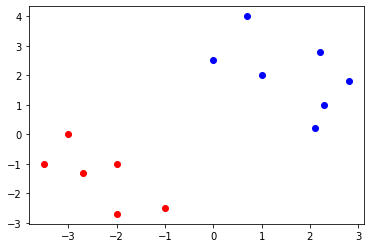

In [ ]:
plot_points(X1, y1)

In [ ]:
class SVM_soft2():
    def __init__(self, X, y):
        self.num_points_class1 = int(X.shape[0] / 2)
        self.num_points_class2 = int(X.shape[0] / 2) + 1
        self.X = X
        self.y = y
        self.d = 2
        self.margin = 1

    def soft_margin(self, C):
        a = Variable((self.d, 1))
        b = Variable()
        u = Variable(self.num_points_class1)
        v = Variable(self.num_points_class2)
        u_dash = np.ones(self.num_points_class1)@u
        v_dash = np.ones(self.num_points_class2)@v
        gamma = Parameter()
        gamma.value = C

        w_norm = norm(a,2)
        obj = Minimize(w_norm + gamma*(u_dash + v_dash))

        const1 = [a.T @ self.X[i] + b >= self.margin - u[i] for i in range(self.num_points_class1)]
        const2 = [a.T @ self.X[i] + b <= -self.margin + v[i-self.num_points_class1] for i in range(self.num_points_class1, self.num_points_class1 + self.num_points_class2)]
        const3 = [u[i] >= 0 for i in range(self.num_points_class1)]
        const4 = [v[i] >= 0 for i in range(self.num_points_class2)]

        const = const1 + const2 + const3 + const4
        problem = Problem(obj, const)
        problem.solve()

        self.w = a.value
        self.b = b.value

    def predict(self):
        pos_corr, neg_corr, incorr = 0,0,0

        for ind, i in enumerate(self.X):
            pred = i.dot(self.w) + self.b
            if pred < 0 and self.y[ind] == -1:
                neg_corr += 1
            elif pred > 0 and self.y[ind] == 1:
                pos_corr += 1
            # else:
            #     incorr += 1

        total_corr = pos_corr + neg_corr
        self.acc = total_corr / self.X.shape[0]

W: [[-0.38493724]
 [-0.35146444]]
B: -0.12133891221723082
Acc: 1.0


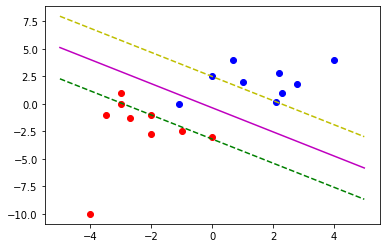

In [ ]:
svm_soft = SVM_soft2(X1, y1)
svm_soft.soft_margin(C=100)
svm_soft.predict()
print(f'W: {svm_soft.w}\nB: {svm_soft.b}\nAcc: {svm_soft.acc}')
plot_classification(new_X, new_y, svm_soft.w, svm_soft.b)

#### Explanation
Support vectors are the data points that lie closest to the decision boundary of an SVM classifier. They are critical to the SVM algorithm because they define the boundary and determine the maximum margin between the two classes. Therefore, removing support vectors from the dataset can significantly change the decision boundary of an SVM classifier.

When we remove support vectors from the dataset, we are effectively removing the most important data points that define the decision boundary. This can cause the decision boundary to shift or become less accurate, as it is now based on a smaller set of data points. Additionally, removing support vectors can lead to overfitting, as the decision boundary may become more complex to fit the remaining data points, which can reduce the generalization ability of the classifier on new unseen data.

In summary, support vectors are essential for defining the decision boundary of an SVM classifier, and removing them can result in significant changes to the decision boundary, potentially leading to reduced accuracy and overfitting.

### Subsection 2

In [5]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-29 11:33:36--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.1s    

2023-03-29 11:33:36 (96.9 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-29 11:33:37--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
L

In [7]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [8]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [9]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [10]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3000, 784)
(3000,)
(3000, 784)
(3000,)


In [12]:
from sklearn import svm
from sklearn import metrics

In [13]:
def class_report(clf, y_test, pred, X_test):
    print(f"Accurqacy score: {metrics.accuracy_score(y_true=y_test, y_pred=pred)}\n")

    print(f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, pred)}\n")

    print(f"confusion_matrix:\n{metrics.confusion_matrix(y_test, pred)}")

In [14]:
# 1
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
class_report(clf, y_test, pred, X_test)

Accurqacy score: 0.8893333333333333

Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000


confusion_matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   

In [15]:
# 2
clf = svm.SVC(C=100, gamma='scale', kernel='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
class_report(clf, y_test, pred, X_test)

Accurqacy score: 0.8893333333333333

Classification report for classifier SVC(C=100, kernel='linear'):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000


confusion_matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4

In [16]:
# 3
clf = svm.SVC(C=0.1, gamma='auto', kernel='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
class_report(clf, y_test, pred, X_test)

Accurqacy score: 0.8893333333333333

Classification report for classifier SVC(C=0.1, gamma='auto', kernel='linear'):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000


confusion_matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6  

In [17]:
# 4
clf = svm.SVC(C=100, kernel='linear')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
class_report(clf, y_test, pred, X_test)

Accurqacy score: 0.8893333333333333

Classification report for classifier SVC(C=100, kernel='linear'):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86       301
           9       0.85      0.85      0.85       326

    accuracy                           0.89      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.89      0.89      0.89      3000


confusion_matrix:
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4

In [18]:
# 5
clf = svm.SVC(C=100, kernel='poly')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
class_report(clf, y_test, pred, X_test)

Accurqacy score: 0.924

Classification report for classifier SVC(C=100, kernel='poly'):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.90      0.98      0.94       346
           2       0.94      0.93      0.94       312
           3       0.92      0.91      0.92       279
           4       0.88      0.90      0.89       281
           5       0.93      0.92      0.93       265
           6       0.94      0.94      0.94       290
           7       0.93      0.90      0.92       303
           8       0.96      0.88      0.92       301
           9       0.89      0.90      0.89       326

    accuracy                           0.92      3000
   macro avg       0.93      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000


confusion_matrix:
[[287   2   1   0   0   2   4   0   1   0]
 [  0 340   1   3   0   0   2   0   0   0]
 [  0   7 291   3   3   0   1   5   1   1]
 [  0

In [19]:
# 6
clf = svm.SVC(C=100, kernel='rbf')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
class_report(clf, y_test, pred, X_test)

Accurqacy score: 0.9413333333333334

Classification report for classifier SVC(C=100):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       297
           1       0.97      0.98      0.97       346
           2       0.94      0.96      0.95       312
           3       0.91      0.93      0.92       279
           4       0.91      0.94      0.93       281
           5       0.95      0.93      0.94       265
           6       0.96      0.95      0.96       290
           7       0.95      0.90      0.92       303
           8       0.96      0.91      0.94       301
           9       0.91      0.92      0.91       326

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000


confusion_matrix:
[[292   0   1   1   1   0   0   1   1   0]
 [  0 340   1   2   0   0   2   1   0   0]
 [  0   1 298   4   2   0   1   4   2   0]
 [  2  

In [20]:
# 7
clf = svm.SVC(C=100, kernel='sigmoid')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
class_report(clf, y_test, pred, X_test)

Accurqacy score: 0.7683333333333333

Classification report for classifier SVC(C=100, kernel='sigmoid'):
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       297
           1       0.91      0.97      0.93       346
           2       0.79      0.77      0.78       312
           3       0.71      0.63      0.67       279
           4       0.72      0.81      0.77       281
           5       0.51      0.68      0.58       265
           6       0.92      0.78      0.85       290
           7       0.86      0.78      0.82       303
           8       0.69      0.72      0.70       301
           9       0.77      0.63      0.69       326

    accuracy                           0.77      3000
   macro avg       0.77      0.76      0.77      3000
weighted avg       0.78      0.77      0.77      3000


confusion_matrix:
[[261   0   6   0   1  17   3   0   7   2]
 [  0 334   0   3   0   6   1   0   2   0]
 [  7   8 239  15   3  10   5   